In [2]:
import pandas as pd
import numpy as np
from agb import agb
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
data = pd.read_csv("data.csv",header=None)

In [15]:
x_train = data.drop([17],axis=1)
y_train = data[17]

In [16]:
agb_n_true       = agb(x_train,y_train,nesterov=True,n_trees=500,subsample=1)
agb_n_false      = agb(x_train,y_train,nesterov=False,n_trees=500,subsample=1)

rmse
rmse


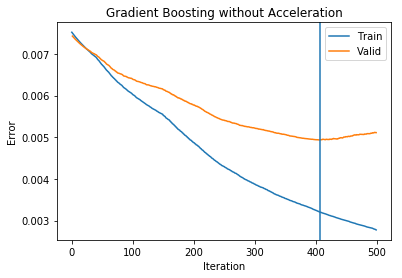

407
0.004932343684912254


In [17]:
plt.plot(agb_n_false['error_train'])
plt.plot(agb_n_false['error_valid'])
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.gca().legend(('Train','Valid'))
plt.axvline(x=np.nanargmin(agb_n_false['error_valid']))
plt.title('Gradient Boosting without Acceleration')
plt.show()
print(np.nanargmin(agb_n_false['error_valid']))
print(np.nanmin(agb_n_false['error_valid']))    

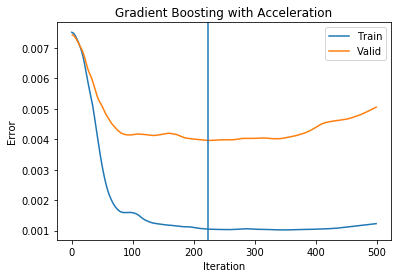

224
0.003963185142612678


In [18]:
plt.plot(agb_n_true['error_train'])
plt.plot(agb_n_true['error_valid'])
plt.axvline(x=np.nanargmin(agb_n_true['error_valid']))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.gca().legend(('Train','Valid'))
plt.title('Gradient Boosting with Acceleration')
plt.show()
print(np.nanargmin(agb_n_true['error_valid']))
print(np.nanmin(agb_n_true['error_valid'])) 